# Perbandingan Rute Terpendek Graph Tak Berarah Menggunakan Q-Learning dan SARSA

Andara Najla Jilan - EWAKO

In [1]:
import numpy as np
import pylab as plt 
import networkx as nx
import pandas as pd 

Buatlah graf tak berarah dengan 11 node (0-10)

In [2]:

edge_list = [(0, 2), (0, 1), (0, 3), (2, 4), (5, 6), (7, 4), (0, 6), (5, 3), (3, 7), (0, 8), (5, 7), (7, 9), (9, 4), (10, 1)]
graph = nx.Graph()
graph.add_edges_from(edge_list)

In [3]:
# tentukan node akhir
goal = 9
# initial state yang digunakan pada testing
initial_state = 0

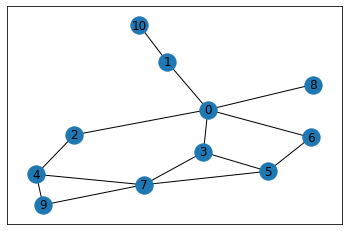

In [4]:
#gambarkan graphnya
position = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, position)
nx.draw_networkx_edges(graph, position)
nx.draw_networkx_labels(graph, position)
plt.show()

In [5]:
# ukuran size matrix dan reward table
SIZE_MATRIX = 11

In [6]:
# buat reward matrix dengan initial value -1
R = np.matrix(np.ones(shape=(SIZE_MATRIX, SIZE_MATRIX)))
R *= -1

In [7]:

for edge in edge_list:
    #print(edge)
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0
    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0

R[goal, goal] = 100

pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0
1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
2,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,100.0,-1.0
5,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0
6,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,100.0,-1.0
8,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,100.0,-1.0


In [8]:
# discount factor
gamma = 0.8
# learning rate
alpha = 0.3

In [9]:
# buat Q table
Q = np.matrix(np.zeros([SIZE_MATRIX, SIZE_MATRIX]))

In [10]:
def get_available_actions(state):
    """
    Get all actions where the rewards are 0 or greater 
    are available from the current state. Action is an edge that exists.
    """
    current_state_row = R[state,]
    available_actions = np.where(current_state_row >= 0)[1]
    return available_actions

In [11]:
def sample_next_action(available_actions):
    """
    Choose the next state at random
    """
    next_action = int(np.random.choice(available_actions, size=1))
    return next_action

In [12]:
def shortest_path(start_state, end_state):
    """
    Test the trained Q-table to find the shortest path
    """
    current_state = start_state
    steps = [current_state]

    while current_state != end_state:

        next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)

        steps.append(next_step_index)
        current_state = next_step_index

    print("Most efficient path:")
    print(steps)

# Q-learning

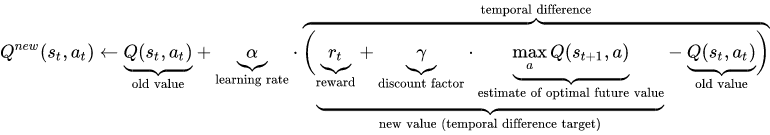

In [13]:
def update_Q(current_state, action, gamma):
    """
    Update Q-values in the current Q-table
    """
    
    # np.where returns a tuple of ndarrays where the output array contains elements 
    # of x where condition is True. We pick the second element of the tuple which 
    # is a list of states where the reward is highest. If there are multiple states 
    # where the reward is highest, we pick one state at random.
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] += alpha * (R[current_state, action] + gamma * max_value - Q[current_state, action])  

## Train menggunakan Q-learning

In [14]:
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = get_available_actions(current_state)
    action = sample_next_action(available_action)
    update_Q(current_state, action, gamma)

print("Trained Q matrix:")
pd.DataFrame(Q)

Trained Q matrix:


,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,126.209719,248.261977,264.499526,0.000000,0.000000,190.598683,0.000000,147.834274,0.000000,0.000000
1,200.856109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.675035
2,199.203363,0.000000,0.000000,0.000000,340.831634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,197.923163,0.000000,0.000000,0.000000,0.000000,263.548268,0.000000,349.955156,0.000000,0.000000,0.000000
4,0.000000,0.000000,248.371554,0.000000,0.000000,0.000000,0.000000,350.220619,0.000000,432.721013,0.000000
5,0.000000,0.000000,0.000000,271.447676,0.000000,0.000000,199.866370,345.880432,0.000000,0.000000,0.000000
6,195.945539,0.000000,0.000000,0.000000,0.000000,270.293288,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,258.574559,339.547966,260.050783,0.000000,0.000000,0.000000,443.451823,0.000000
8,209.989910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,339.092228,0.000000,0.000000,345.051475,0.000000,446.101990,0.000000


## Test shortest path, trained using Q-learning method

In [15]:
shortest_path(initial_state, goal)

Most efficient path:
[0, 3, 7, 9]


# SARSA


In [16]:
def update_Q_SARSA(current_state, action, gamma):
    """
    Update Q-values in the current Q-table using SARSA
    """
    available_action = get_available_actions(action)
    next_action = sample_next_action(available_action)
    next_state = action

    Q[current_state, action] += alpha * (R[current_state, action] + gamma * Q[next_state, next_action] - Q[current_state, action])  

## Train menggunakan SARSA

In [17]:
#inisialisasi Q-matrix
Q = np.matrix(np.zeros([SIZE_MATRIX, SIZE_MATRIX]))

In [18]:
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = get_available_actions(current_state)
    action = sample_next_action(available_action)
    update_Q_SARSA(current_state, action, gamma)

print("Trained Q matrix:")
pd.DataFrame(Q)

Trained Q matrix:


,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,9.090631,28.320022,27.478562,0.000000,0.000000,8.987848,0.000000,7.781316,0.000000,0.000000
1,12.498151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.315321
2,13.855504,0.000000,0.000000,0.000000,32.051694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,16.994953,0.000000,0.000000,0.000000,0.000000,21.342427,0.000000,71.246239,0.000000,0.000000,0.000000
4,0.000000,0.000000,26.952053,0.000000,0.000000,0.000000,0.000000,82.189672,0.000000,192.362316,0.000000
5,0.000000,0.000000,0.000000,12.992587,0.000000,0.000000,10.662077,81.504179,0.000000,0.000000,0.000000
6,5.666727,0.000000,0.000000,0.000000,0.000000,23.685323,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,15.910203,57.893406,30.445647,0.000000,0.000000,0.000000,158.436475,0.000000
8,19.587867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,62.230927,0.000000,0.000000,79.354523,0.000000,203.015263,0.000000


In [19]:
shortest_path(initial_state, goal)

Most efficient path:
[0, 2, 4, 9]
